In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",64)
test_loader = test_loader("CIFAR10",64)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 128
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(64,0.5)
optimizer = "Adam"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,64,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS64-PD128-ADAM")

Epoch: 0, step: 50/781, loss: 4.847793102264404
Epoch: 0, step: 100/781, loss: 4.785947322845459
Epoch: 0, step: 150/781, loss: 4.610872745513916
Epoch: 0, step: 200/781, loss: 4.750985145568848
Epoch: 0, step: 250/781, loss: 4.677622318267822
Epoch: 0, step: 300/781, loss: 4.58932638168335
Epoch: 0, step: 350/781, loss: 4.705165863037109
Epoch: 0, step: 400/781, loss: 4.668722629547119
Epoch: 0, step: 450/781, loss: 4.617432594299316
Epoch: 0, step: 500/781, loss: 4.540459632873535
Epoch: 0, step: 550/781, loss: 4.503303527832031
Epoch: 0, step: 600/781, loss: 4.568127632141113
Epoch: 0, step: 650/781, loss: 4.369901657104492
Epoch: 0, step: 700/781, loss: 4.4056830406188965
Epoch: 0, step: 750/781, loss: 4.462372779846191
Epoch: 0 completed, average loss: 4.601132246352035, time taken: 1.0460788567860921 mins
Epoch: 1, step: 50/781, loss: 4.382876396179199
Epoch: 1, step: 100/781, loss: 4.399372100830078
Epoch: 1, step: 150/781, loss: 4.48917818069458
Epoch: 1, step: 200/781, loss: 4

Epoch: 10, step: 50/781, loss: 3.6774983406066895
Epoch: 10, step: 100/781, loss: 3.6668365001678467
Epoch: 10, step: 150/781, loss: 3.6329352855682373
Epoch: 10, step: 200/781, loss: 3.726125717163086
Epoch: 10, step: 250/781, loss: 3.7202398777008057
Epoch: 10, step: 300/781, loss: 3.732386589050293
Epoch: 10, step: 350/781, loss: 3.6291253566741943
Epoch: 10, step: 400/781, loss: 3.620816230773926
Epoch: 10, step: 450/781, loss: 3.713996171951294
Epoch: 10, step: 500/781, loss: 3.698460578918457
Epoch: 10, step: 550/781, loss: 3.702361822128296
Epoch: 10, step: 600/781, loss: 3.67887282371521
Epoch: 10, step: 650/781, loss: 3.710508346557617
Epoch: 10, step: 700/781, loss: 3.7994227409362793
Epoch: 10, step: 750/781, loss: 3.723400354385376
Epoch: 10 completed, average loss: 3.679199475179714, time taken: 1.019485596815745 mins
Epoch: 11, step: 50/781, loss: 3.65558123588562
Epoch: 11, step: 100/781, loss: 3.6110613346099854
Epoch: 11, step: 150/781, loss: 3.713317394256592
Epoch: 1

Epoch: 19, step: 650/781, loss: 3.52154803276062
Epoch: 19, step: 700/781, loss: 3.581482410430908
Epoch: 19, step: 750/781, loss: 3.5873537063598633
Epoch: 19 completed, average loss: 3.572869172932702, time taken: 1.021898376941681 mins
Epoch: 20, step: 50/781, loss: 3.604487180709839
Epoch: 20, step: 100/781, loss: 3.4989871978759766
Epoch: 20, step: 150/781, loss: 3.471179723739624
Epoch: 20, step: 200/781, loss: 3.4828150272369385
Epoch: 20, step: 250/781, loss: 3.631005048751831
Epoch: 20, step: 300/781, loss: 3.5952963829040527
Epoch: 20, step: 350/781, loss: 3.6250498294830322
Epoch: 20, step: 400/781, loss: 3.6244280338287354
Epoch: 20, step: 450/781, loss: 3.5766870975494385
Epoch: 20, step: 500/781, loss: 3.7512435913085938
Epoch: 20, step: 550/781, loss: 3.5796778202056885
Epoch: 20, step: 600/781, loss: 3.5822064876556396
Epoch: 20, step: 650/781, loss: 3.5289597511291504
Epoch: 20, step: 700/781, loss: 3.599292039871216
Epoch: 20, step: 750/781, loss: 3.5077576637268066
E

Epoch: 29, step: 400/781, loss: 3.485677719116211
Epoch: 29, step: 450/781, loss: 3.485398530960083
Epoch: 29, step: 500/781, loss: 3.4771296977996826
Epoch: 29, step: 550/781, loss: 3.424435615539551
Epoch: 29, step: 600/781, loss: 3.522284984588623
Epoch: 29, step: 650/781, loss: 3.6144566535949707
Epoch: 29, step: 700/781, loss: 3.4715850353240967
Epoch: 29, step: 750/781, loss: 3.478961944580078
Epoch: 29 completed, average loss: 3.518325163979231, time taken: 1.0233301798502603 mins
Epoch: 30, step: 50/781, loss: 3.4667835235595703
Epoch: 30, step: 100/781, loss: 3.57932710647583
Epoch: 30, step: 150/781, loss: 3.4920923709869385
Epoch: 30, step: 200/781, loss: 3.5167629718780518
Epoch: 30, step: 250/781, loss: 3.5145013332366943
Epoch: 30, step: 300/781, loss: 3.533331871032715
Epoch: 30, step: 350/781, loss: 3.642106533050537
Epoch: 30, step: 400/781, loss: 3.492770195007324
Epoch: 30, step: 450/781, loss: 3.491698980331421
Epoch: 30, step: 500/781, loss: 3.5055718421936035
Epoc

Epoch: 39, step: 150/781, loss: 3.5231289863586426
Epoch: 39, step: 200/781, loss: 3.4358127117156982
Epoch: 39, step: 250/781, loss: 3.512899160385132
Epoch: 39, step: 300/781, loss: 3.4574573040008545
Epoch: 39, step: 350/781, loss: 3.4239003658294678
Epoch: 39, step: 400/781, loss: 3.5219411849975586
Epoch: 39, step: 450/781, loss: 3.3706552982330322
Epoch: 39, step: 500/781, loss: 3.4540295600891113
Epoch: 39, step: 550/781, loss: 3.6116700172424316
Epoch: 39, step: 600/781, loss: 3.467189073562622
Epoch: 39, step: 650/781, loss: 3.4400618076324463
Epoch: 39, step: 700/781, loss: 3.51530385017395
Epoch: 39, step: 750/781, loss: 3.4113824367523193
Epoch: 39 completed, average loss: 3.480473587363386, time taken: 1.0253662546475728 mins
Epoch: 40, step: 50/781, loss: 3.491694211959839
Epoch: 40, step: 100/781, loss: 3.5427849292755127
Epoch: 40, step: 150/781, loss: 3.409656047821045
Epoch: 40, step: 200/781, loss: 3.472142219543457
Epoch: 40, step: 250/781, loss: 3.484743595123291
E

Epoch: 48, step: 750/781, loss: 3.48494815826416
Epoch: 48 completed, average loss: 3.4541992039137095, time taken: 1.0237843553225199 mins
Epoch: 49, step: 50/781, loss: 3.438276767730713
Epoch: 49, step: 100/781, loss: 3.4744699001312256
Epoch: 49, step: 150/781, loss: 3.4028208255767822
Epoch: 49, step: 200/781, loss: 3.438408136367798
Epoch: 49, step: 250/781, loss: 3.407572031021118
Epoch: 49, step: 300/781, loss: 3.4862380027770996
Epoch: 49, step: 350/781, loss: 3.439267873764038
Epoch: 49, step: 400/781, loss: 3.3643531799316406
Epoch: 49, step: 450/781, loss: 3.39343523979187
Epoch: 49, step: 500/781, loss: 3.4470369815826416
Epoch: 49, step: 550/781, loss: 3.4460132122039795
Epoch: 49, step: 600/781, loss: 3.506725549697876
Epoch: 49, step: 650/781, loss: 3.446432590484619
Epoch: 49, step: 700/781, loss: 3.450136661529541
Epoch: 49, step: 750/781, loss: 3.3863370418548584
Epoch: 49 completed, average loss: 3.457585700495448, time taken: 1.0233352263768514 mins
Epoch: 50, step

Epoch: 58, step: 500/781, loss: 3.387012004852295
Epoch: 58, step: 550/781, loss: 3.49708890914917
Epoch: 58, step: 600/781, loss: 3.388895034790039
Epoch: 58, step: 650/781, loss: 3.4119977951049805
Epoch: 58, step: 700/781, loss: 3.397855043411255
Epoch: 58, step: 750/781, loss: 3.450122833251953
Epoch: 58 completed, average loss: 3.434490497530499, time taken: 1.024469534556071 mins
Epoch: 59, step: 50/781, loss: 3.4117581844329834
Epoch: 59, step: 100/781, loss: 3.3888866901397705
Epoch: 59, step: 150/781, loss: 3.346972942352295
Epoch: 59, step: 200/781, loss: 3.5581836700439453
Epoch: 59, step: 250/781, loss: 3.4644720554351807
Epoch: 59, step: 300/781, loss: 3.3402652740478516
Epoch: 59, step: 350/781, loss: 3.494441509246826
Epoch: 59, step: 400/781, loss: 3.400989532470703
Epoch: 59, step: 450/781, loss: 3.3750269412994385
Epoch: 59, step: 500/781, loss: 3.4171154499053955
Epoch: 59, step: 550/781, loss: 3.410485029220581
Epoch: 59, step: 600/781, loss: 3.5011887550354004
Epoc

Epoch: 68, step: 250/781, loss: 3.4142239093780518
Epoch: 68, step: 300/781, loss: 3.4793362617492676
Epoch: 68, step: 350/781, loss: 3.472616195678711
Epoch: 68, step: 400/781, loss: 3.552341938018799
Epoch: 68, step: 450/781, loss: 3.466278076171875
Epoch: 68, step: 500/781, loss: 3.4116485118865967
Epoch: 68, step: 550/781, loss: 3.3770477771759033
Epoch: 68, step: 600/781, loss: 3.3438234329223633
Epoch: 68, step: 650/781, loss: 3.4152770042419434
Epoch: 68, step: 700/781, loss: 3.3673434257507324
Epoch: 68, step: 750/781, loss: 3.490037441253662
Epoch: 68 completed, average loss: 3.422760052503911, time taken: 1.0222644368807474 mins
Epoch: 69, step: 50/781, loss: 3.398921489715576
Epoch: 69, step: 100/781, loss: 3.3722050189971924
Epoch: 69, step: 150/781, loss: 3.4158642292022705
Epoch: 69, step: 200/781, loss: 3.4597742557525635
Epoch: 69, step: 250/781, loss: 3.4585249423980713
Epoch: 69, step: 300/781, loss: 3.3935391902923584
Epoch: 69, step: 350/781, loss: 3.360634088516235

Epoch: 78, step: 50/781, loss: 3.4337213039398193
Epoch: 78, step: 100/781, loss: 3.4384303092956543
Epoch: 78, step: 150/781, loss: 3.434976100921631
Epoch: 78, step: 200/781, loss: 3.4837701320648193
Epoch: 78, step: 250/781, loss: 3.378652572631836
Epoch: 78, step: 300/781, loss: 3.338869333267212
Epoch: 78, step: 350/781, loss: 3.418342351913452
Epoch: 78, step: 400/781, loss: 3.3157386779785156
Epoch: 78, step: 450/781, loss: 3.4277310371398926
Epoch: 78, step: 500/781, loss: 3.327678680419922
Epoch: 78, step: 550/781, loss: 3.3531978130340576
Epoch: 78, step: 600/781, loss: 3.356548309326172
Epoch: 78, step: 650/781, loss: 3.4228343963623047
Epoch: 78, step: 700/781, loss: 3.4452688694000244
Epoch: 78, step: 750/781, loss: 3.3635902404785156
Epoch: 78 completed, average loss: 3.405421324789753, time taken: 1.023890233039856 mins
Epoch: 79, step: 50/781, loss: 3.4071433544158936
Epoch: 79, step: 100/781, loss: 3.375231981277466
Epoch: 79, step: 150/781, loss: 3.4270224571228027
Ep

Epoch: 87, step: 650/781, loss: 3.4326906204223633
Epoch: 87, step: 700/781, loss: 3.3764262199401855
Epoch: 87, step: 750/781, loss: 3.4296774864196777
Epoch: 87 completed, average loss: 3.393507465052391, time taken: 1.020607312520345 mins
Epoch: 88, step: 50/781, loss: 3.4263923168182373
Epoch: 88, step: 100/781, loss: 3.4984209537506104
Epoch: 88, step: 150/781, loss: 3.474045991897583
Epoch: 88, step: 200/781, loss: 3.455385684967041
Epoch: 88, step: 250/781, loss: 3.3715999126434326
Epoch: 88, step: 300/781, loss: 3.379927158355713
Epoch: 88, step: 350/781, loss: 3.4320828914642334
Epoch: 88, step: 400/781, loss: 3.437286615371704
Epoch: 88, step: 450/781, loss: 3.4036288261413574
Epoch: 88, step: 500/781, loss: 3.4022233486175537
Epoch: 88, step: 550/781, loss: 3.3279454708099365
Epoch: 88, step: 600/781, loss: 3.3805959224700928
Epoch: 88, step: 650/781, loss: 3.379070997238159
Epoch: 88, step: 700/781, loss: 3.3793342113494873
Epoch: 88, step: 750/781, loss: 3.4391000270843506

Epoch: 97, step: 400/781, loss: 3.3861377239227295
Epoch: 97, step: 450/781, loss: 3.5179672241210938
Epoch: 97, step: 500/781, loss: 3.3325982093811035
Epoch: 97, step: 550/781, loss: 3.3979594707489014
Epoch: 97, step: 600/781, loss: 3.386512041091919
Epoch: 97, step: 650/781, loss: 3.378547430038452
Epoch: 97, step: 700/781, loss: 3.4683749675750732
Epoch: 97, step: 750/781, loss: 3.403489351272583
Epoch: 97 completed, average loss: 3.3871096178755717, time taken: 1.020644191900889 mins
Epoch: 98, step: 50/781, loss: 3.337293863296509
Epoch: 98, step: 100/781, loss: 3.3583948612213135
Epoch: 98, step: 150/781, loss: 3.4147465229034424
Epoch: 98, step: 200/781, loss: 3.3918190002441406
Epoch: 98, step: 250/781, loss: 3.4536309242248535
Epoch: 98, step: 300/781, loss: 3.3308613300323486
Epoch: 98, step: 350/781, loss: 3.4273200035095215
Epoch: 98, step: 400/781, loss: 3.4274518489837646
Epoch: 98, step: 450/781, loss: 3.341956615447998
Epoch: 98, step: 500/781, loss: 3.456497430801391

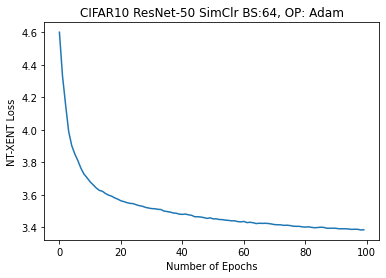

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:64, OP: Adam")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS64-PD128-ADAM.png")

In [7]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS64-PD128-ADAM", "wb") as fp: 
    pickle.dump(train_loss, fp)